In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!nvidia-smi

Mon Feb 19 19:12:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [11]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5432.0/8062.4 GB disk)


In [7]:
from ultralytics import YOLO

from IPython.display import display, Image


In [8]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

[Errno 2] No such file or directory: '{HOME}'
/kaggle/working
100%|███████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 133MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100%|████████████████████████████████████████| 104k/104k [00:00<00:00, 51.4MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /kaggle/working/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 107.2ms
Speed: 12.8ms preprocess, 107.2ms inference, 671.3ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [12]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)



Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /kaggle/working/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 91.1ms
Speed: 4.4ms preprocess, 91.1ms inference, 500.6ms postprocess per image at shape (1, 3, 640, 384)


In [13]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [14]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets


/kaggle/working/datasets


In [15]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="e2NRiLm6ZN2yD23yWWEm")
project = rf.workspace("coins-jkzui").project("coin-detection-lvpg5")
dataset = project.version(15).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 4.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 34.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled


Extracting Dataset Version Zip to coin-detection-15 in yolov8:: 100%|██████████| 7180/7180 [00:01<00:00, 4334.46it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=60 imgsz=1024  plots=True


/kaggle/working
New https://pypi.org/project/ultralytics/8.1.16 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/datasets/coin-detection-15/data.yaml, epochs=60, patience=50, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None

In [12]:
!ls {HOME}/runs/detect/train/

F1_curve.png					   train_batch1.jpg
PR_curve.png					   train_batch10100.jpg
P_curve.png					   train_batch10101.jpg
R_curve.png					   train_batch10102.jpg
args.yaml					   train_batch2.jpg
confusion_matrix.png				   val_batch0_labels.jpg
confusion_matrix_normalized.png			   val_batch0_pred.jpg
events.out.tfevents.1708340367.bf4545038d23.127.0  val_batch1_labels.jpg
labels.jpg					   val_batch1_pred.jpg
labels_correlogram.jpg				   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


/kaggle/working


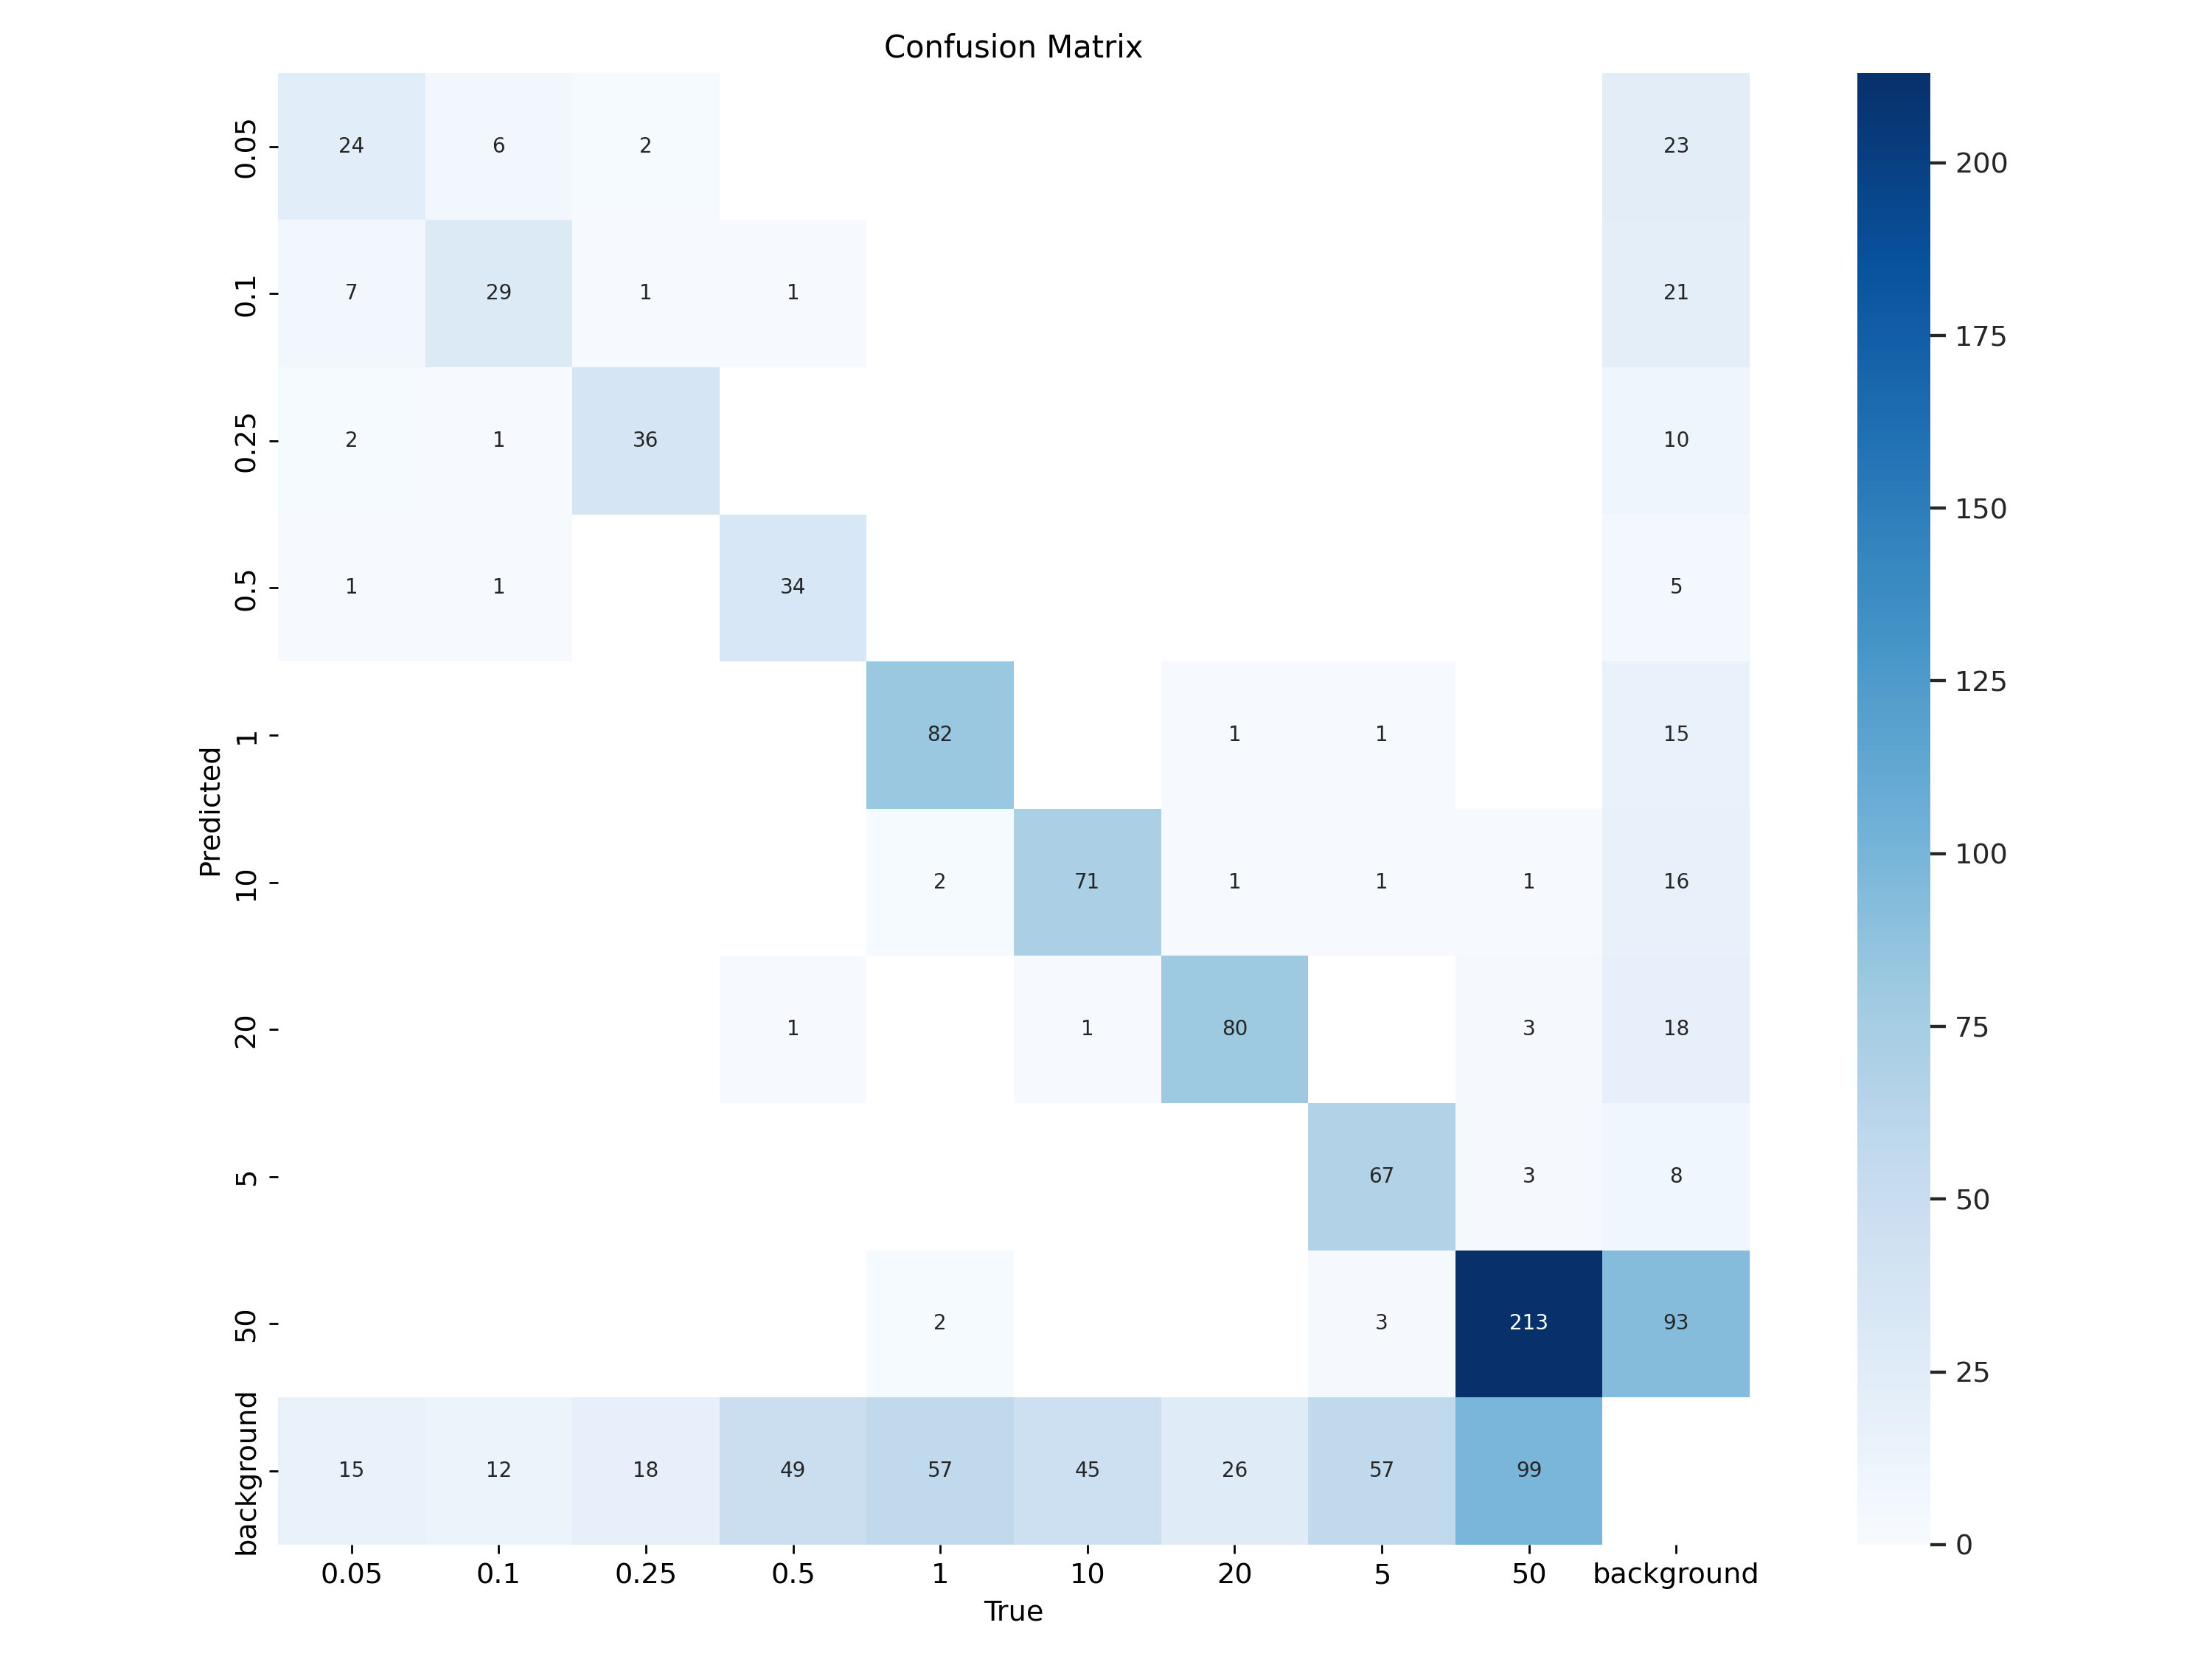

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)


/kaggle/working


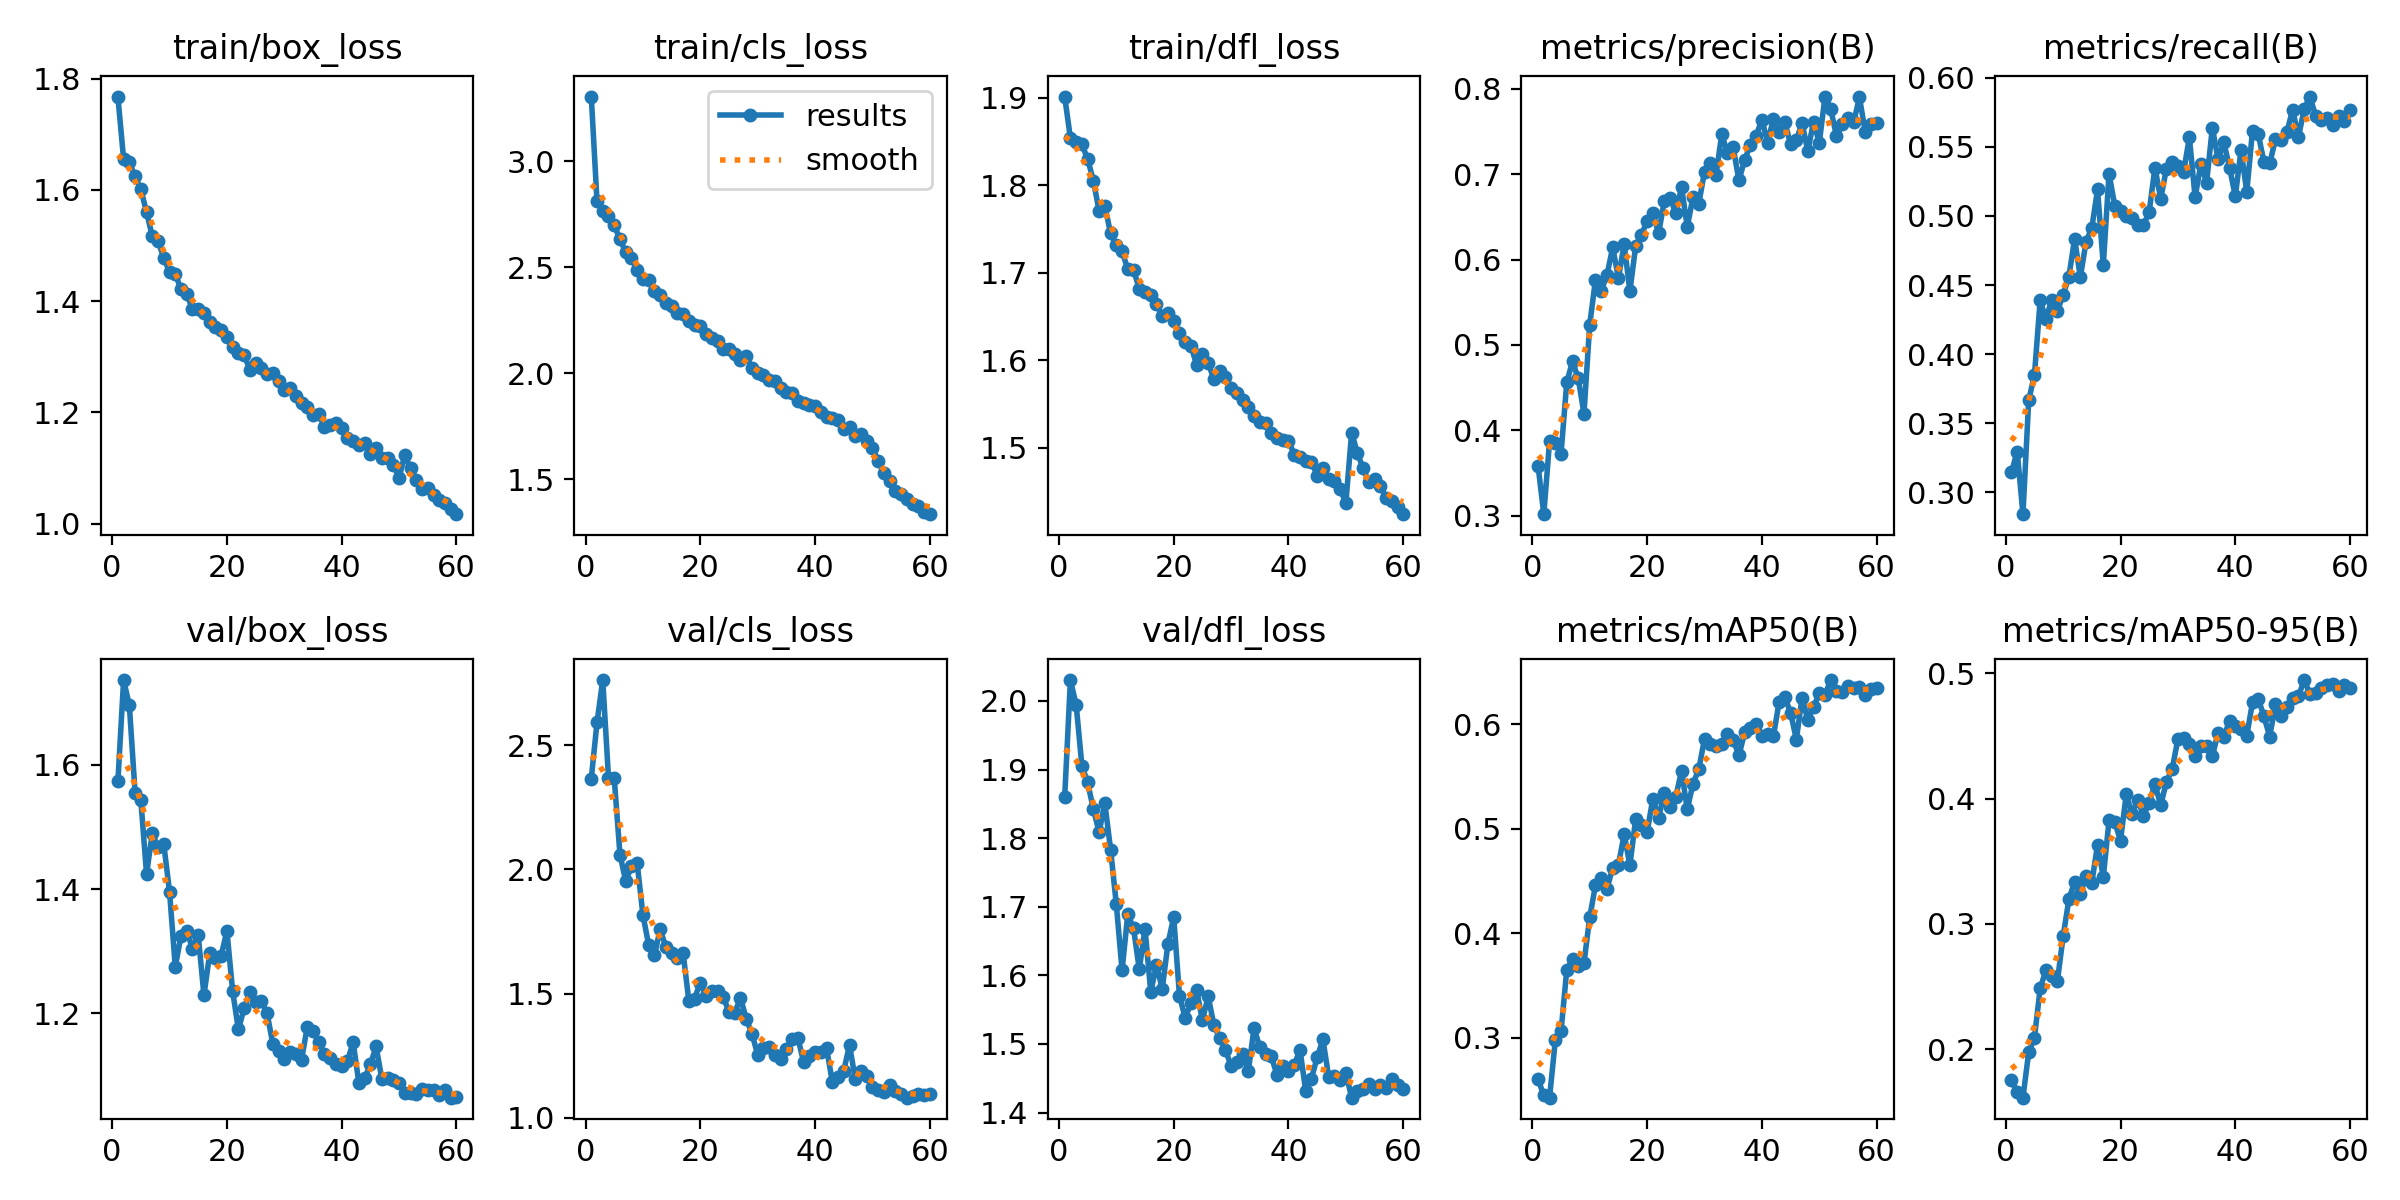

In [14]:

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)


/kaggle/working


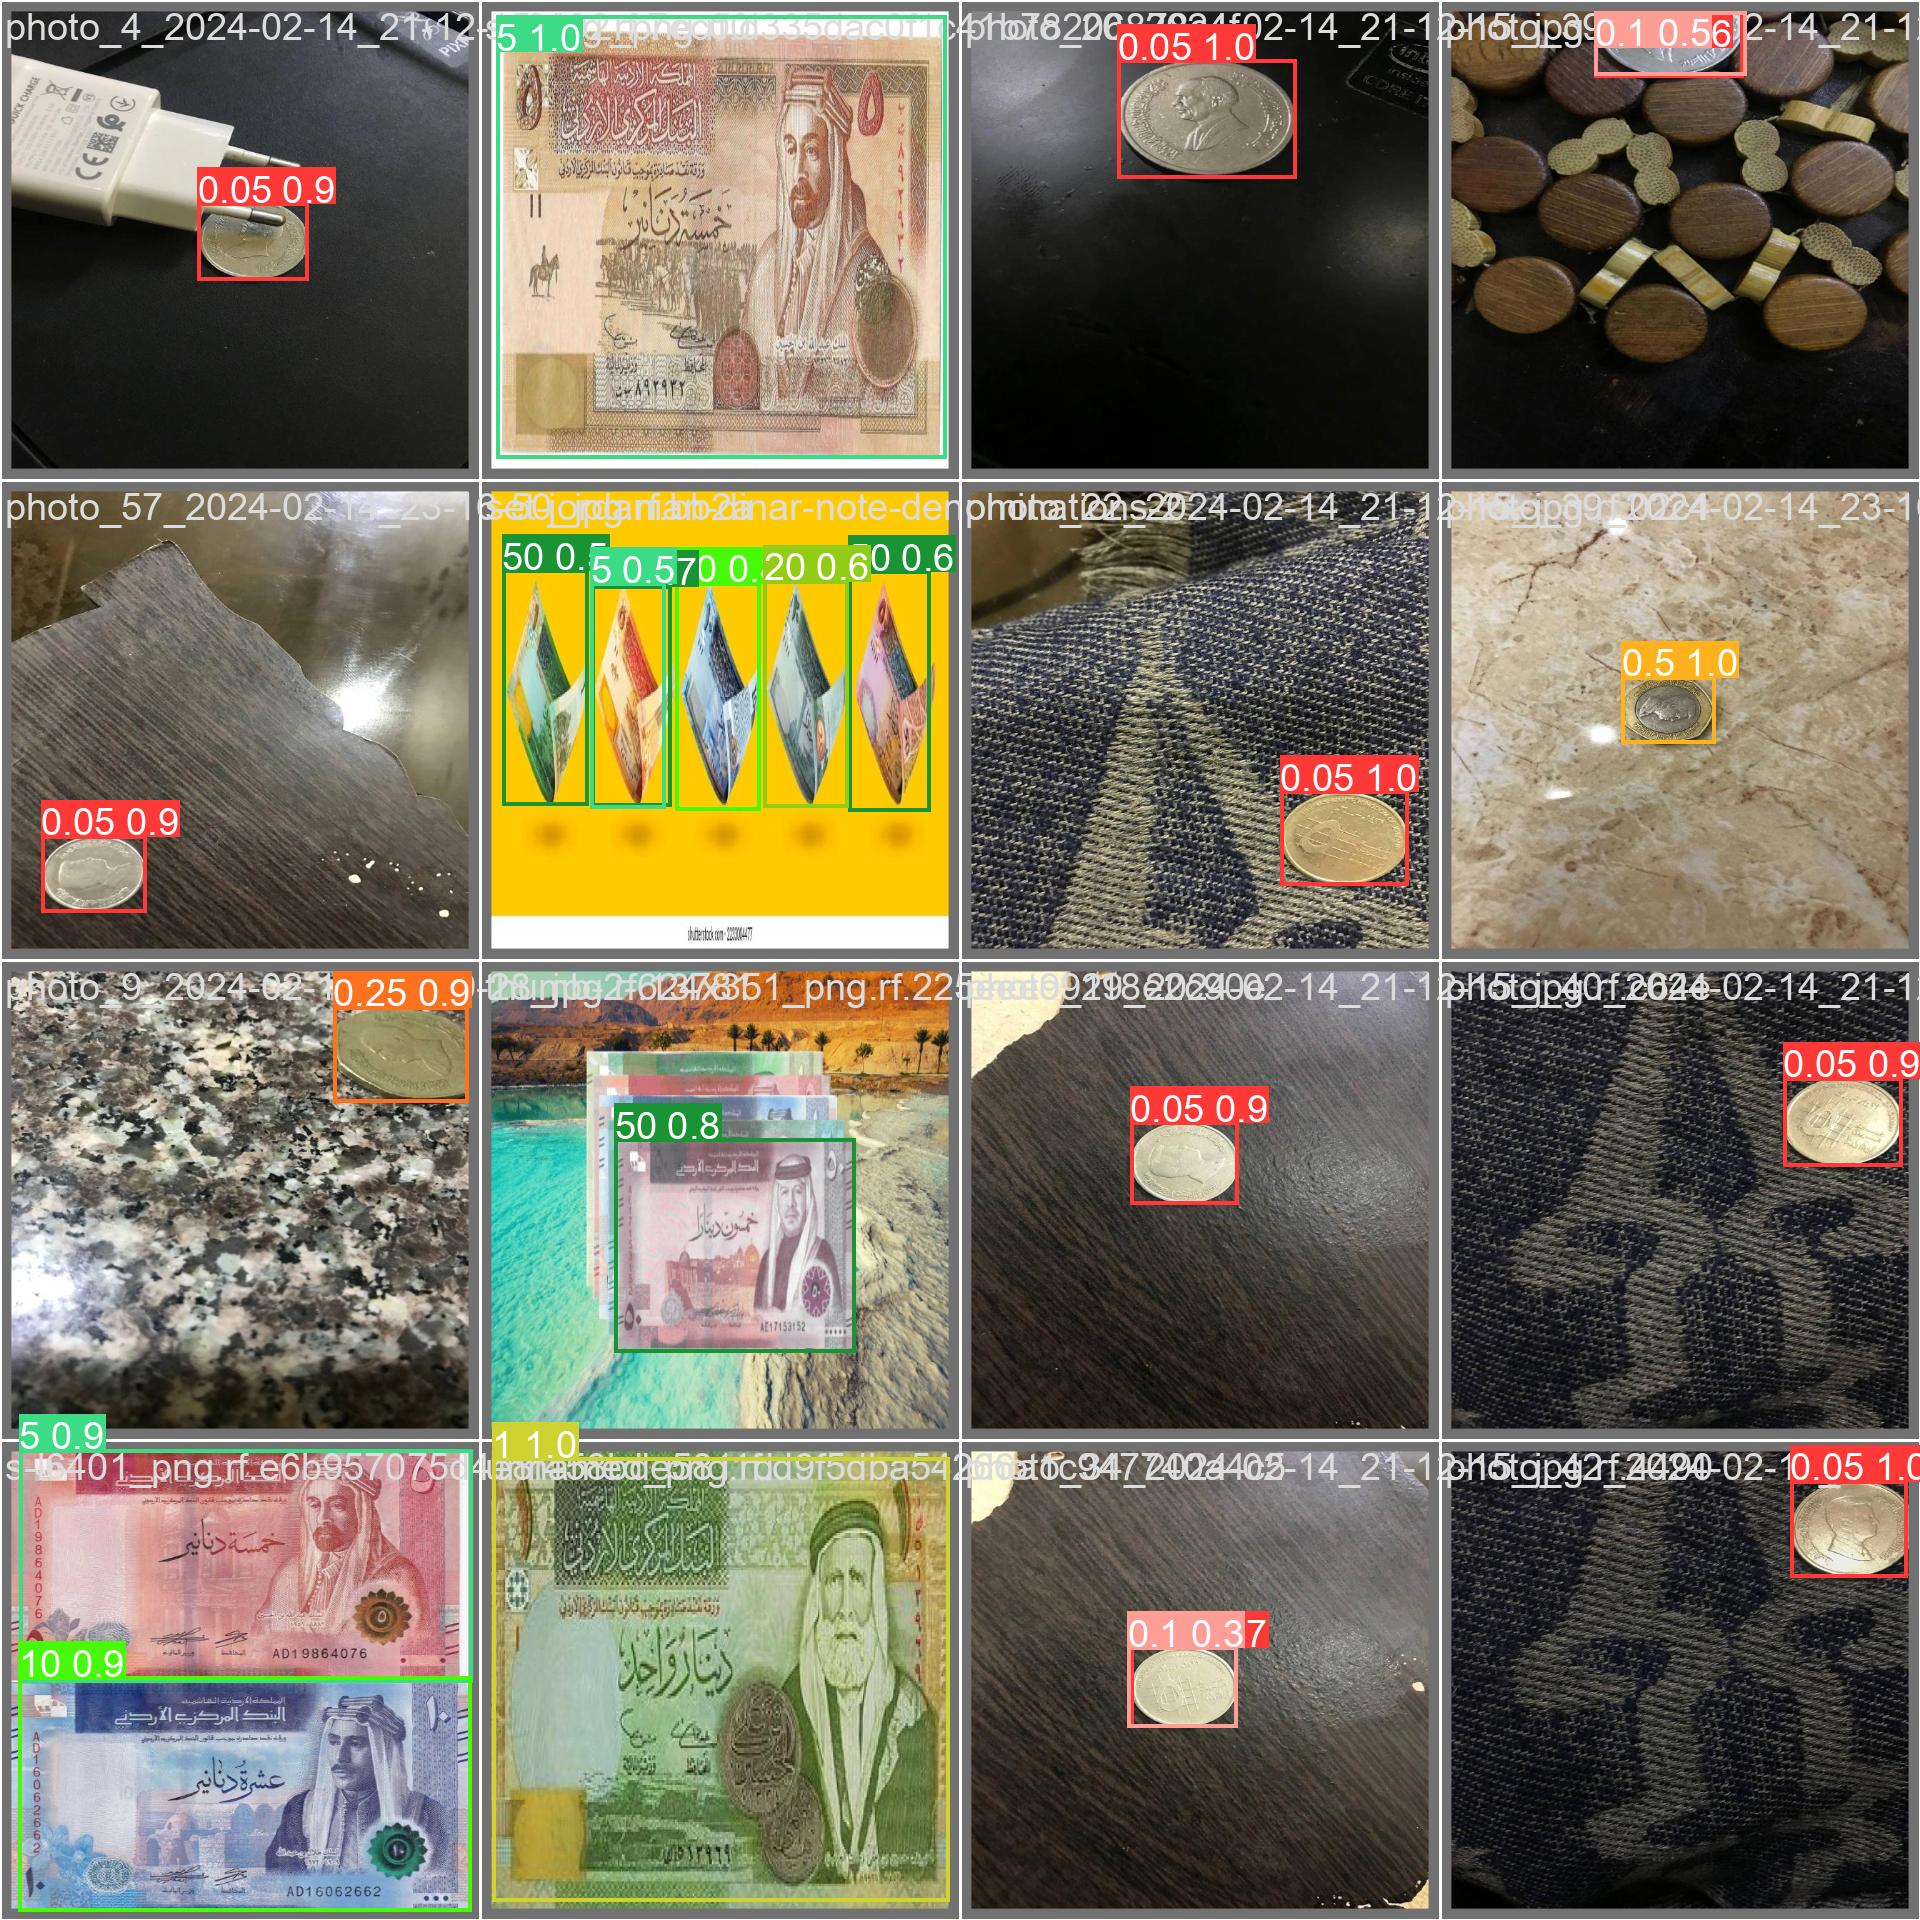

In [15]:

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)


In [16]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml


/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /kaggle/working/datasets/coin-detection-13/valid/labels.cache... 2
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 547, len(boxes) = 1056. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        258       1056      0.776      0.577      0.642      0.495
                  0.05        258         49      0.542      0.508      0.513       0.48
                   0.1        258         49      0.595      0.653      0.604      0.536
                  0.25        258         57       0.79       0.66       0.69      0.548
                   0.5        

In [17]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True


/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/107 /kaggle/working/datasets/coin-detection-13/test/images/0_lYIu3WPlziEC1b28_png.rf.54f2a646dd1588f666f937d92bc2a071.jpg: 640x640 2 0.25s, 2 0.5s, 2 1s, 1 20, 1 50, 16.1ms
image 2/107 /kaggle/working/datasets/coin-detection-13/test/images/1-jordanian-dinar-banknote-great-arab-revolt-reverse-1_png.rf.79cefcd06a18323f25fa82e0ccfc1334.jpg: 640x640 1 1, 16.1ms
image 3/107 /kaggle/working/datasets/coin-detection-13/test/images/1043_jpg.rf.ffd9052f8c33a2e90b16e0bb9eb428cd.jpg: 640x640 1 10, 16.0ms
image 4/107 /kaggle/working/datasets/coin-detection-13/test/images/1093_jpg.rf.e43eb43d80c2187eb99d0bb860fdaf5f.jpg: 640x640 1 10, 16.0ms
image 5/107 /kaggle/working/datasets/coin-detection-13/test/images/10_Piaster_Jordanien_png.rf.c331829533ad6f7f5334a5d5dcf3f052.jpg: 6

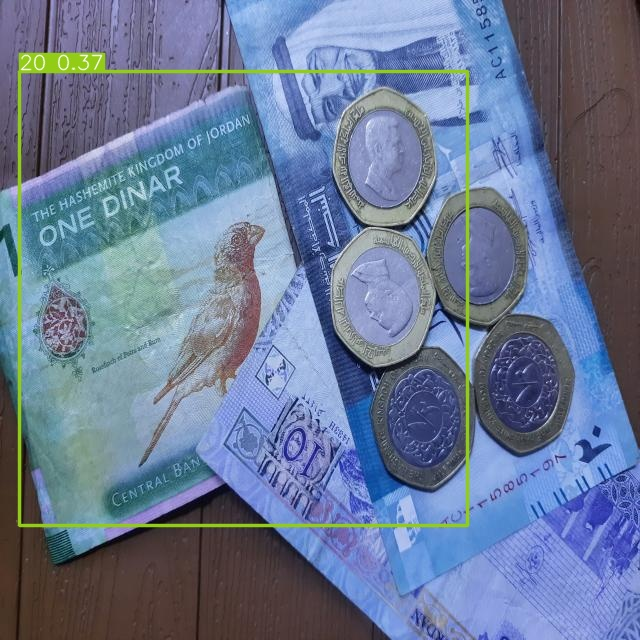

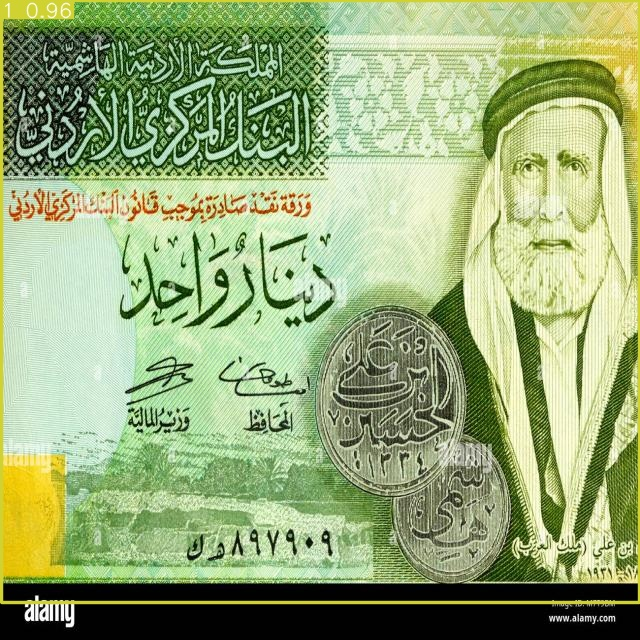

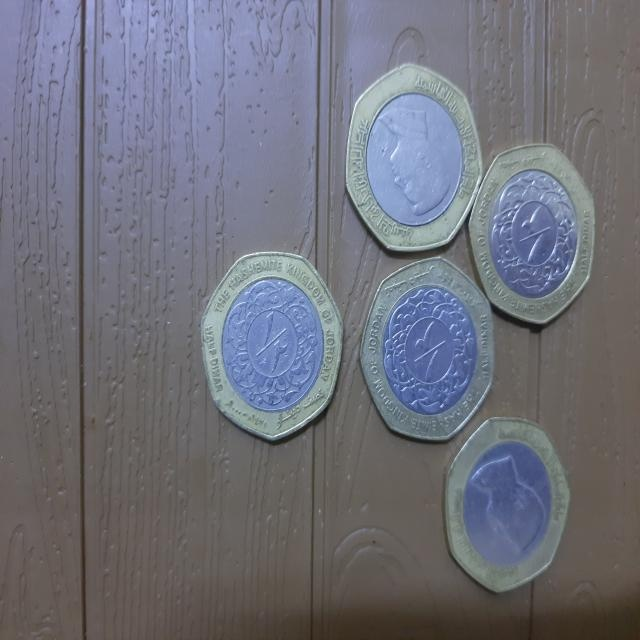

In [18]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [19]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")


View the status of your deployment at: https://app.roboflow.com/coins-jkzui/coin-detection-lvpg5/13
Share your model with the world at: https://universe.roboflow.com/coins-jkzui/coin-detection-lvpg5/model/13


In [20]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on depositphotos_425301672-stock-photo-world-money-collection-fragments-of_png.rf.01d7162562bcf6ce5a0a2f36a346603c.jpg


HTTPError: 403 Client Error: Forbidden for url: https://detect.roboflow.com/coin-detection-lvpg5/13?api_key=e2NRiLm6ZN2yD23yWWEm&name=YOUR_IMAGE.jpg&overlap=30&confidence=40&stroke=1&labels=false&format=json